## 線形回帰
単純なモデルの1つである線形回帰モデルの詳細を見る

- 閉形式の方程式を利用
  - 訓練セットにベストフィットさせるためのモデルパラメータを直接計算する
- 勾配降下法
  - 訓練セットに対して損失関数が最小になるように、モデルパラメータを少しずつ操作
  - バッチ、ミニバッチ、確率的勾配降下法

##　非線形回帰
- 過学習の判定、そのリスクを避けるための正則化テクニック

## ロジスティック回帰とソフトマックス回帰


O = [1,2,3,4,5]

x_train = [
  [3,4,5,6,7],
  [3,4,5,6,7],
  [3,4,5,6,7],
  [3,4,5,6,7],
]

x_test = [
  [3,4,5,6,7],
]


In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

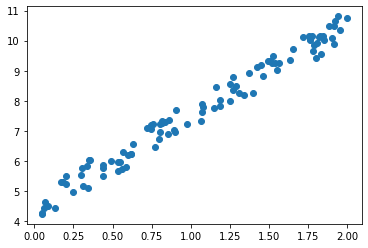

In [6]:
plt.plot(X, y, 'o')

In [7]:
X_b = np.c_[np.ones((100, 1)), X]
X_b[:5]

array([[1.        , 0.8325218 ],
       [1.        , 0.61795023],
       [1.        , 1.63035076],
       [1.        , 0.7562586 ],
       [1.        , 1.51530966]])

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.45026374],
       [3.09513213]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.45026374],
       [10.64052799]])

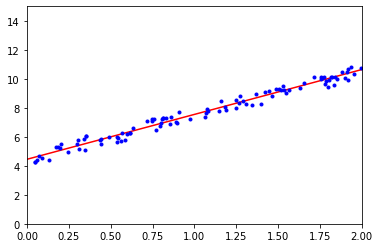

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.45026374]), array([[3.09513213]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.45026374],
       [10.64052799]])

In [13]:
np.linalg.lstsq(X_b, y, rcond=1e-6)

(array([[4.45026374],
        [3.09513213]]),
 array([8.02117802]),
 2,
 array([15.15640277,  3.89903117]))

# 4.2 Gradient descent

## 4.2.1 batch gradient descent

In [14]:
eta = 0.1
n_iterations = 1000
m = 100

In [3]:
import numpy as np

theta = np.random.randn(2, 1) # set random initial feature
theta

array([[-0.12638297],
       [ 0.21154882]])

In [15]:
for iter in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [16]:
theta

array([[4.45026374],
       [3.09513213]])

## 4.2.2 SGD (stochastic gradient descent)

In [17]:
n_epochs = 50
t0, t1 = 5, 50

In [18]:
def learning_schedule(t):
  return t0 / (t + t1)

In [19]:
theta = np.random.randn(2, 1) # set random initial feature
theta

array([[0.20205039],
       [0.90716325]])

In [20]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.4558528],
       [3.0954708]])

## 4.3 多項式回帰

In [1]:
import numpy as np

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

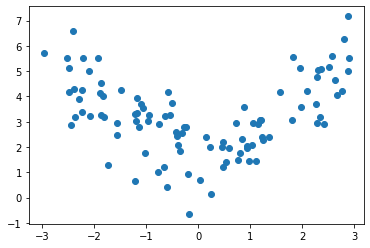

In [4]:
plt.plot(X, y, 'o')

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [7]:
X[0], X_poly[0]

(array([-1.16538107]), array([-1.16538107,  1.35811304]))

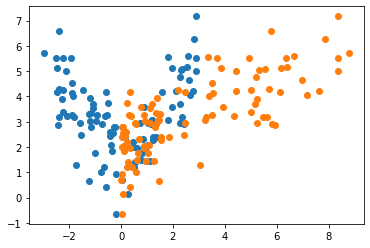

In [8]:
plt.plot(X_poly, y, 'o')

In [9]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X)

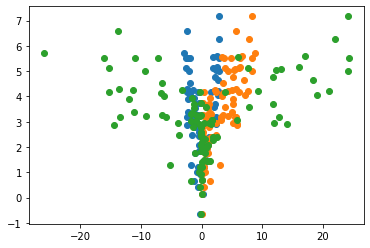

In [10]:
plt.plot(X_poly_3, y, 'o')

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.base import clone

poly_scaler = Pipeline([
  ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
  ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
  max_iter=1,
  tol=-np.infty,
  warm_start=True,
  penalty=None,
  learning_rate="constant",
  eta0=0.0005
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)

  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
    

### 4.6.3

In [5]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [11]:
X = iris["data"][:, 3:]
X[:10]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

In [7]:
# verginica or not
y = (iris["target"] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new[:10]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703]])

In [13]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability')

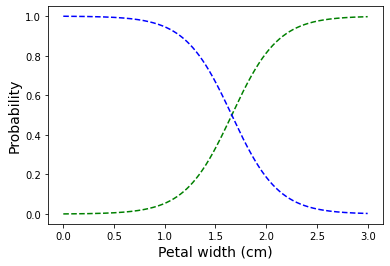

In [18]:
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="NotIris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

In [44]:
log_reg.predict([[1.0], [1.5], [1.7], [2.0]])

array([0, 0, 1, 1])